# AI

AI is the simulation of human intelligence processes by computer systems.

## AI Classification

<img src="images/ai-classification.png" heigth="300" width="400" />

### Supervised Learning

It's all about label data.

<img src="images/label-vs-unlabeled.png" heigth="300" width="400" />

Labels vs Features

**Features**: These are the independent variables or **inputs that you feed into your model**. They are the **characteristics of the data** that the model uses to learn and make predictions. For example, in a dataset of houses, the features might include the **number of bedrooms**, **the size** of the house in square feet, the **location**, etc.

**Labels**: These are the dependent variables or **outputs** that you want the **model to predict**. They are the **"answer"** or the **result that the model** is trained to predict. In the house dataset example, the label might be the price of the house.

### Supervised Learning - Use Cases

* Spam Detection: Spam vs Ham
* Image Recognition: Hotdog vs Not Hotdog
* Predict House Pricing, Predict Stock Prices: Regression
* Cusotomer Churn Prediction: Churn vs Not Churn
* Credit Scoring Prediction: Good vs Bad

### Supervised Learning - Algorithms

<img src="images/regression-vs-classification.png" heigth="300" width="400" />

* Regression
  * Linear Regression
  * Decision Trees
  * Random Forest
  * Gradient Boosting
  * Support Vector Machines
* Classification
  * Logistic Regression
  * Decision Trees
  * Random Forest
  * Gradient Boosting
  * Support Vector Machines
  * Naive Bayes

### Linear Regression (Regression)

Using Python Sklearn. 

Linear regression is a statistical method used to model the relationship between a dependent variable (y) and one or more independent variables (x)

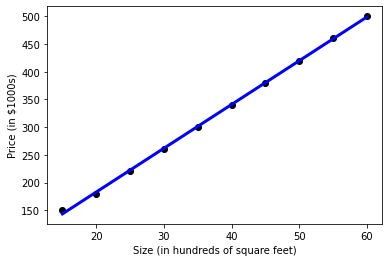

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# House sizes in square feet (in hundreds)
sizes = np.array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60]).reshape((-1, 1))

# Corresponding house prices in $1000s
prices = np.array([150, 180, 220, 260, 300, 340, 380, 420, 460, 500])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(sizes, prices)

# Make predictions using the testing set
price_pred = regr.predict(sizes)

# Plot outputs
plt.scatter(sizes, prices,  color='black')
plt.plot(sizes, price_pred, color='red', linewidth=3)
plt.xlabel('Size (in hundreds of square feet)')
plt.ylabel('Price (in $1000s)')
plt.show()

Linear regression, the equation is usually written as:
```
y = b + mx + e
```
where:
```
b is the y-intercept of the regression line
m is the slope of the regression line
e is the error term (the difference between the actual and predicted values)
```

The slope m and y-intercept b are determined during the training process. The training process involves finding the values of m and b that minimize the sum of the squared error terms. This method is called the method of least squares.


### Logistic Regression (Classification)

Logistic regression is a statistical method used to model the relationship between a dependent variable (y) and one or more 
Independent variables (x) when the dependent variable is binary.
Binary values like 0/1, yes/no, true/false

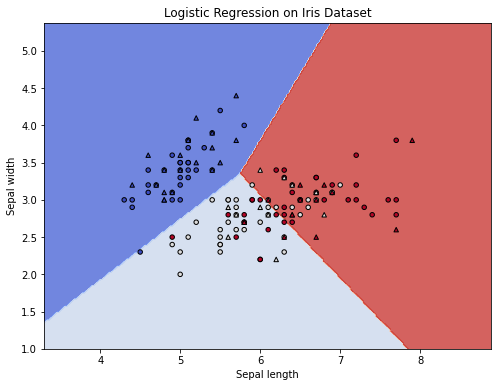

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Create Logistic Regression classifier
clf = LogisticRegression(max_iter=200)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='^')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression on Iris Dataset')
plt.show()

#### About the dataset

**Iris** dataset, which is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in 1936. This dataset is freely available in the sklearn.datasets module and consists of *50 samples* from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor).

#### Linear Regression vs Logistic Regression

**Linear Regression**: This algorithm is used for **regression** problems, where the goal is to **predict a continuous output variable**. It **models the relationship between one or more independent variables (features)** and a continuous dependent variable (outcome). The relationship is modeled as a linear function, hence the name Linear Regression.

**Logistic Regression**: Despite its name, Logistic Regression is used for **classification** problems, where the goal is to **predict a categorical** output variable. It models the probability that a given input point belongs to a certain category. The **output** of logistic regression is **transformed with a logistic/sigmoid function** to ensure that the **output is between 0 and 1**, which can be interpreted as the **probability of the positive class**.

In [11]:
import numpy as np

## Sigmoid function - guarantees output between 0 and 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(f"Sigmoid 100 = {sigmoid(100)}")
print(f"Sigmoid 2 = {sigmoid(2)}")
print(f"Sigmoid 0 == {sigmoid(0)}")

Sigmoid 100 = 1.0
Sigmoid 2 = 0.8807970779778823
Sigmoid 0 == 0.5


#### Decision Trees

Decision Trees make the data be continuously split according to a certain parameter. It's used for both regression and classification problems.


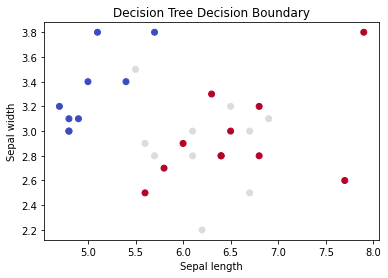

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Tree Decision Boundary')
plt.show()

#### Random Forest

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

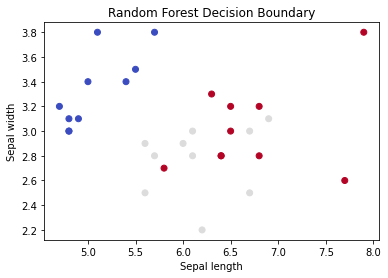

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Random Forest Decision Boundary')
plt.show()

#### Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems. It's a Ensemble method.

**Boosting**: Boosting is an ensemble technique where **new models are added to correct the errors made by existing models**. Models are added sequentially until no further improvements can be made.

**Gradient Boosting**: Gradient Boosting is an extension over boosting method. It uses the **gradient descent algorithm** which can **optimize** any differentiable **loss function**. An ensemble of weak prediction models. It generalizes them by allowing optimization of an arbitrary differentiable loss function.

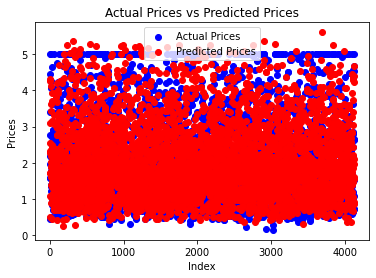

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Plot actual prices
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Prices')

# Plot predicted prices
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted Prices')

plt.xlabel("Index")
plt.ylabel("Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

#### Support Vector Machines

**Support Vector Machines (SVM)** is used for both classification or regression. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the **hyper-plane that differentiates the two classes**.



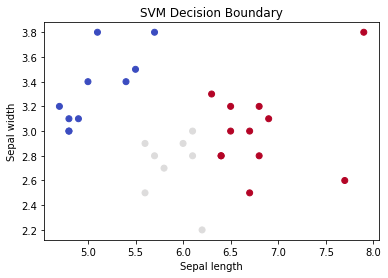

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM
clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Plot the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary')
plt.show()